## 練習 09_12
> * 將 下列圖片 彩色載入

> * 將原圖片取 3x3 Kernel 侵蝕 3 次<br>
> * 將原圖片取 3x3 Kernel 膨脹 3 次<br>
> * 將原圖片取 3x3 Kernel Open<br>
> * 將原圖片取 SIFT 後, 並將它在圖上畫出特徵點<br>
> * 將原圖片取 自適應直方圖均衡 後, 並劃出均衡後直方圖, 同時 show 出均衡後的圖片<br>

### 必須將上列個各處理後的圖 imshow 出來

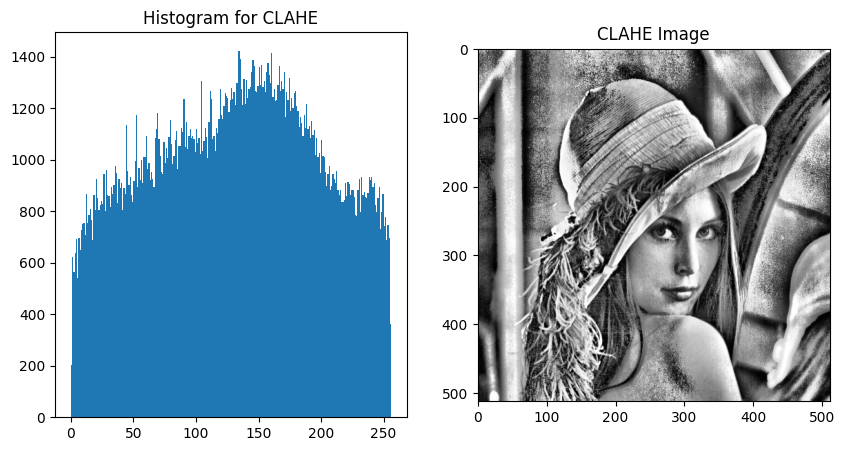

-1

In [4]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# 讀取圖片
img = cv2.imread('../image/lenaColor.png')
cv2.imshow('original', img)
cv2.waitKey(0)

# 3x3 Kernel 侵蝕 3 次
kernel = np.ones((3, 3), np.uint8)
erosion = cv2.erode(img, kernel, iterations=3)
cv2.imshow('Erosion', erosion)
cv2.waitKey(0)

# 3x3 Kernel 膨脹 3 次
dilation = cv2.dilate(img, kernel, iterations=3)
cv2.imshow('Dilation', dilation)
cv2.waitKey(0)

# 3x3 Kernel Open
opening = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)
cv2.imshow('Opening', opening)
cv2.waitKey(0)

# 圖片取 SIFT 後, 並將其在圖上畫出特徵點
sift = cv2.SIFT_create()
keypoints, _ = sift.detectAndCompute(img, None)
img_sift = cv2.drawKeypoints(img, keypoints, None)
cv2.imshow('SIFT', img_sift)
cv2.waitKey(0)

# 自適應直方圖均衡
# 轉換為灰階圖像
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# 應用 CLAHE（對比度限制的自適應直方圖均衡化）
clahe = cv2.createCLAHE()
clahe_img = clahe.apply(gray)

# 顯示直方圖和均衡化後的圖像
plt.figure(figsize=(10, 5))
plt.subplot(121); plt.hist(clahe_img.ravel(), 256, [0, 256]); plt.title('Histogram for CLAHE')
plt.subplot(122); plt.imshow(clahe_img, cmap='gray'); plt.title('CLAHE Image')
plt.show()

cv2.destroyAllWindows()
cv2.waitKey(1)
